# Übungsblatt 3

In [10]:
import numpy as np
from pprint import pprint
from numpy import array, zeros, diag, diagflat, dot
import pprint
import scipy
import math
import scipy.linalg
import matplotlib.pyplot as plt


## Aufgabe 3.1 
### Vektorräume
Welche der folgenden Mengen sind R-Vektorräume? Begründen Sie!

a) C 

b) Q

c) G0=Menge aller Ursprungsgeraden

d) G=Menge aller Geraden

e) I=Menge aller invertierbaren n×n-Matrizen

f) D=Menge aller n × n-Diagonalmatrizen

g) H=Menge aller harmonischen Schwingungen

h) M=IEEE 754 double-Zahlen

### Lösung:

#### Erinnerung Vektorraum Axiome:
Sei K ∈ {Q, R, C} 

Eine Menge V heißt K-Vektorraum, wenn für alle u, v, w ∈ V und alle λ, µ ∈ K
die folgenden Verknüpfungen in V liegen, und es gilt:
* A1) u + v = v + u
* A2) (u + v) + w = u + (v + w)
* A3) es gibt einen Nullvektor 0 mit v + 0 = v
* A4) es gibt einen inversen Vektor −v mit v − v = 0
* S1) λ · (u + v) = λ · u + λ · v
* S2) (λ + µ) · u = λ · u + µ · u
* S3) (λ · µ) · u = λ · (µ · u)

Beachte zunächst, dass R-Vektorräume Vektorräume auf reelen Zahlen darstellen.

a)

* A1: Die Summe auf C ist komponentenweise Definiert und liegt immer in C.
* A2: Das Assioziativgesetz gilt.
* A3: Nullvektor existiert als 0 + 0i
* A4: Zu jedem Vektor existiert ein inverser Vektor (zu a +bi ist stets -a-bi invers).
* S1) Gilt trivialer Weise.
* S2) Gilt ebenso.
* S3) Ebenso.

b) Ist offensichtlich ebenso R-Vr.

c) Es sei jedes Element eindeutig bestimmt durch die Steigung $m$.

Definiere Addition auf G0 als:
$m_1 + m_2 = m_res$

Analog gelte für die Multiplikation:
$m_1 \cdot m_2 = m_{res}$

Dann folgt für die Axiome:

* A1: $m_1 + m_2 = m_{12} = m_1 + m_2 = m_res$ -> Gilt
* A2: $(m_1 + m_2) +m_3 =m_{12} +m_3 = m_{123} = m_1 + (m_{23}) = m_1 + (m_2 +m_3) = m_res$
* A3: Nullvektor ist die Ursprungsgerade mit der Steigung Null. Somit gilt: m+0=m.
* A4: Inverse existieren, da jede Steigung ein negative Pendant hat.
* S1,2 und 3 gelten trivialer Weise.

d) 
# Hilfe!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
Wie sind Operationen auf geraden defineirt???

e) Kann kein Vektorraum sein, da die Nullmatrix nicht invertierbar ist und damit kein Nullvektor existiert. (A3)

f)
* A1: Gilt offensichtlich.
* A2: Ebenso.
* A3: Da die Nullmatrix eine Diagonalmatrix ist, gilt auch A3.
* A4: Gilt offensichtlich.
* S1, S2, S3: Die Multiplikation und Addidtion sind elementweise definiert. Dadurch gelten S1, S2 und S3.

g) Die Menge aller harmonischen Schwingungen ist definiert durch Amplitude und Frequenz.


## Aufgabe 3.2 
### Vektorraum-Basis

Geben Sie für die Vektorräume aus Aufgabe 3.1 eine Basis und die Dimension.

* a) Orthonormalbasis (1,0),(0,1) -> Dimension 2.
* b) 1 -> Dimension 1
* c) f(x) = x, Dimension 1
* d) f(x) = x, Dimension 1
* e) Dimension = Rang der Matrix (Da Diagonal)

## Aufgabe 3.3 
### LU-Zerlegung

Bestimmen Sie die LU-Zerlegung von

$A = \begin{pmatrix}
  4 & 2 & 1\\ 
  2 & 4 & 2\\
  1 & 2 & 4
\end{pmatrix}$ 

In [35]:
# LU-Zerlegung (ohne Zeilentausch)
def LU(A):
    m,n = A.shape
    L = np.eye(n)
    U = A.astype('float')
    for k in range(n-1):
        for j in range(k+1,m):
            L[j,k] = U[j,k]/U[k,k]
            U[j,k:] = U[j,k:]-L[j,k]*U[k,k:]
    return (L,U)

A = np.array([[4,2,1],[2,4,2],[1,2,4]])
L, U = LU(A)

print(L)
print(U)


[[1.   0.   0.  ]
 [0.5  1.   0.  ]
 [0.25 0.5  1.  ]]
[[4.  2.  1. ]
 [0.  3.  1.5]
 [0.  0.  3. ]]


## Aufgabe 3.4 
### Gauß-Verfahren

Implementieren Sie das Gauß-Verfahren und bestimmen Sie damit die unbekannten Verkehrsdichten
$x_1, x_2, x_3, x_4$ in folgender Abbildung (s. Skript). Nehmen Sie dazu zusätzlich an, dass $−2x_2+x_4 = 0$
ist.

<img src="files/img/Ü3skizze1.PNG" alt="Drawing" style="width: 350px;"/>

Erstelle LGS mit Hilfe der Knoten:

$
\begin{pmatrix}
  1 & 0 & 0 & 0\\ 
  1 & -1 & 0 & 0\\
  0 & 1 & -1 & 0\\
  0 & 0 & 1 & -1
\end{pmatrix}\cdot
\begin{pmatrix}
  x_1\\ 
  x_2\\
  x_3\\
  x_4
\end{pmatrix}=
\begin{pmatrix}
  610-450\\ 
  400-640\\
  600\\
  -520
\end{pmatrix}$ 


In [21]:
#Implementierung Gauß Algorithmus (vgl. Übungsblatt 2)
def elimination (a, b):
    n = a.shape [0]
    for i in range(n):                         # n-Maliges durchführen
        for j in range (i +1 , n):             # n^2 maliges Durchführen
            faktor = a [j, i]/ a[i, i]
            b[j] -= b[i]* faktor
            for k in range (i , n ):           # n^3 maliges Durchführen
                a[j, k] -=a[i, k]*faktor
def substitution (a, b):
    n = a.shape [0]
    x = np.empty(n)
    for i in range (n -1 , -1 , -1):
        zaehler = b[i]
    for j in range (i +1, n):
        zaehler -= a[i, j]*x[j]
        x[i] = zaehler/a[i, i]
    return x

a = np.array([[1, 0, 0, 0] ,[1, -1, 0, 0] ,[0, 1, -1, 0],[0, 0, 1, -1]] , dtype = float)
b = np.array([160, -240, 600, -520], dtype=float)
elimination (a, b)

print("a und b Nach Gauß Elimination:")
pprint.pprint(a)
pprint.pprint(b)
print(substitution (a, b))

a und b Nach Gauß Elimination:
array([[ 1.,  0.,  0.,  0.],
       [ 0., -1.,  0.,  0.],
       [ 0.,  0., -1.,  0.],
       [ 0.,  0.,  0., -1.]])
array([ 160., -400.,  200., -320.])
[160. 400. 200. 320.]


## Aufgabe 3.5 
### Simulation mit LU-Zerlegung

Das Verkehrsmodell aus Aufgabe 3.4 soll jetzt über einen kompletten Tagesverlauf simuliert werden.
Dafür sind die Zu- und Abflüsse folgendermaßen als Funktionen (t in h) gegeben.
<img src="files/img/Ü3skizze2.PNG" alt="Drawing" style="width: 350px;"/>
Es gilt:

$
\begin{align}
z_A(t) &= 610 − 100 sin \Bigl(\frac{\pi}{12}t\Bigl)\\
a_A(t) &= 450 − 25 sin \Bigl(\frac{\pi}{3}t + 5\Bigl)\\
z_B(t) &= 400 − 20 sin \Bigl(\frac{\pi}{3}t - 1\Bigl)\\
a_B(t) &= 640 + 50 sin \Bigl(\frac{\pi}{12}t - 7\Bigl)\\
z_C(t) &= 600 + 10 sin \Bigl(\frac{\pi}{6}t + 4\Bigl)\\
a_D(t) &= zA − aA + zB − aB + zC
\end{align}
$

Zusätzlich ist: $−2x_2 + x_4 = 0$

Gehen Sie für die Simulation folgendermaßen vor:
* Notieren Sie das LGS in Abhängigkeit von $t$ in der Form $A·x(t) = b(t)$, mit einer quadratischen
Matrix A.
* Bestimmen Sie eine LU-Zerlegung der Koeffizientenmatrix $A$. Berechnen Sie die Zerlegung

von Hand oder nutzen Sie dazu eine Funktion, die Ihnen z.B. Matlab zur Verfügung stellt.

* Werten Sie die rechte Seite b für jede Minute des Tages aus. Dies liefert Ihnen jeweils eine
konkrete rechte Seite bi

* Lösen Sie mit Hilfe der LU-Zerlegung jedes LGS $A · x = bi$

* Plotten Sie die vier Verkehrsflüsse $x_1, x_2, x_3, x_4$ über einen Tagesverlauf.
Könnten die Straßen mit den angegebenen Verkehrsdichten als Einbahnstraßen realisiert werden?



A:
array([[-1,  0,  0,  1],
       [ 1, -1,  0,  0],
       [ 0,  1, -1,  0],
       [ 0,  0,  1, -1]])
P:
array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])
L:
array([[ 1.,  0.,  0.,  0.],
       [-1.,  1.,  0.,  0.],
       [-0., -1.,  1.,  0.],
       [-0., -0., -1.,  1.]])
U:
array([[-1.,  0.,  0.,  1.],
       [ 0., -1.,  0.,  1.],
       [ 0.,  0., -1.,  1.],
       [ 0.,  0.,  0.,  0.]])


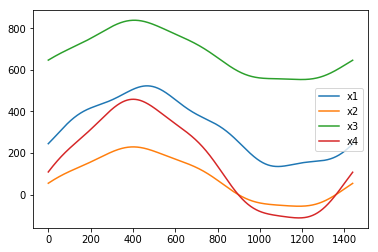

In [13]:
#scipy array erstellen
A = np.array([ [-1, 0, 0, 1], [1, -1, 0, 0], [0, 1, -1, 0], [0, 0, 1, -1] ])
#scipy LU Zerlegung
P, L, U = scipy.linalg.lu(A)
#Ausgabe:
print("A:")
pprint.pprint(A)
print("P:")
pprint.pprint(P)
print("L:")
pprint.pprint(L)
print("U:")
pprint.pprint(U)

pi = 3.14159265
#60 Minuten mal 24 Stunden
x1 = []
x2 = []
x3 = []
x4 = []
for i in range(1440):
    #t in Studnen
    t  = i/60
    za = 610-100*math.sin((pi/12)*t)
    aa = 450-25*math.sin((pi/3)*t+5)
    zb = 400-20*math.sin((pi/3)*t-1)
    ab = 640 + 50*math.sin((pi/12)*t-7)
    zc = 600 + 10*math.sin((pi/6)*t+4)
    ad = za - aa - zb - ab + zc
    b =np.array([aa-za,ab-zb,-zc,ad])

    c = np.zeros(4)
    #Bestimme c mittels b = Lc
    length = len(A)

    #finde c Vektor
    c = np.linalg.solve(L,b)
    #wir wissen, dass die letzte Zeile Nullzeile ist, deswegen ist die Operation legitim
    U[-1]=[0,-2,0,1]
    c[3]=0
    #finde x vektor
    x = np.linalg.solve(U,c)
    x1.append(x[0])
    x2.append(x[1])
    x3.append(x[2])
    x4.append(x[3])
a,=plt.plot(x1, label ='x1')
b,=plt.plot(x2, label ='x2')
c,=plt.plot(x3, label ='x3')
d,=plt.plot(x4, label ='x4')
plt.legend(handles=[a, b,c,d])
plt.show()


## Aufgabe 3.6 
### Jacobi-Iteration

Lösen Sie das LGS

$
\begin{align}
&4x_1 &+ &x_2 &+ &2x_3 &= &7\\
&2x_1 &+ &2x_2 &+ &x_3 &= &7\\
&&&x_2 &+ &2x_3 &= &3
\end{align}
$

mit Hilfe der Jacobi-Iteration auf 6 Nachkommastellen genau.


In [8]:
#Aus itnernet kopiert.... evtl selbst machen... ist nicht schön
def jacobi(A,b,N=25,x=None):
    """Solves the equation Ax=b via the Jacobi iterative method."""
    # Create an initial guess if needed                                                                                                                                                            
    if x is None:
        x = zeros(len(A[0]))

    # Create a vector of the diagonal elements of A                                                                                                                                                
    # and subtract them from A                                                                                                                                                                     
    D = diag(A)
    R = A - diagflat(D)

    # Iterate for N times                                                                                                                                                                          
    for i in range(N):
        x = (b - dot(R,x)) / D
    return x

A = np.array([[4,1,2], [2, 2, 1], [0, 1, 2]])
b = np.array([7, 7, 3])
guess = array([1,1,1])

sol = jacobi(A,b,N=25,x=guess)

print("A:")
pprint(A)

print("b:")
pprint(b)

print("x:")
pprint(sol)

A:
array([[4, 1, 2],
       [2, 2, 1],
       [0, 1, 2]])
b:
array([7, 7, 3])
x:
array([1.00631714, 2.34382629, 0.33926392])
